# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [3]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [4]:
## load dataset here
df = pd.read_csv("icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [5]:
## parsing data here
images, labels = parse_data(df)


In [6]:
labels = pd.Categorical(labels) #feature engineering

In [7]:
labels

[0, 0, 2, 4, 6, ..., 6, 3, 0, 3, 2]
Length: 35887
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

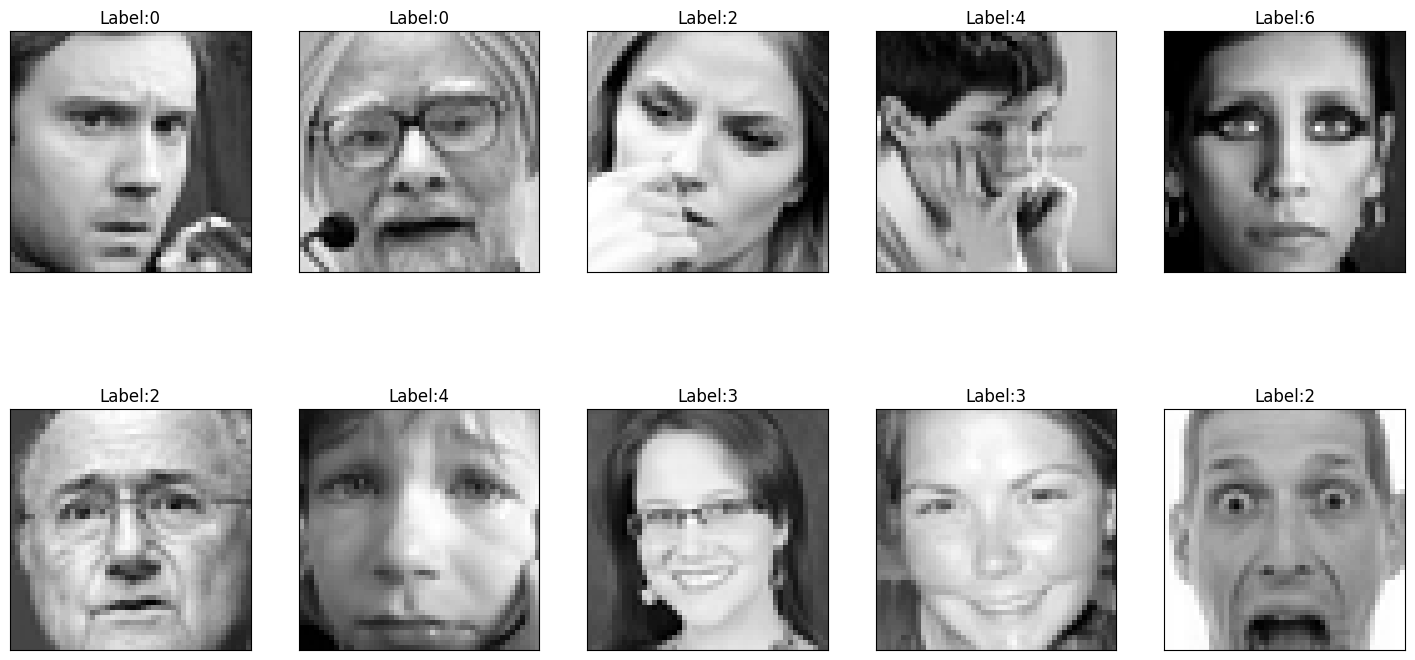

In [8]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [9]:
def tranform_image_array(images):
    matrix = np.zeros(shape=(len(images), 48* 48))
    for i,image in enumerate(images):
        matrix[i] = image.flatten()
    return matrix
data_transf = tranform_image_array(images)
# def tranform_image_col_row(images): 
#     matrix = np.zeros(shape=(len(images), 48 + 48))
#     for i,image in enumerate(images):
#         matrix[i] = np.array([sum(row) for row in image ] + [sum(image[:,col]) for col in range(len(image)) ])
#     return matrix
# data_transf = tranform_image_array(images)
# data_transf2 = tranform_image_col_row(images)

Pca with 2 pcs

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data_transf) ## modify images' array to the appropriate shape

PCA(n_components=2)

In [11]:
sum(pca.explained_variance_ratio_)

0.3872889997373411

In [12]:
## transform for visualizing here
data_pca =pca.transform(data_transf) ## modify images' array to the appropriate shape
data_pca.shape

(35887, 2)

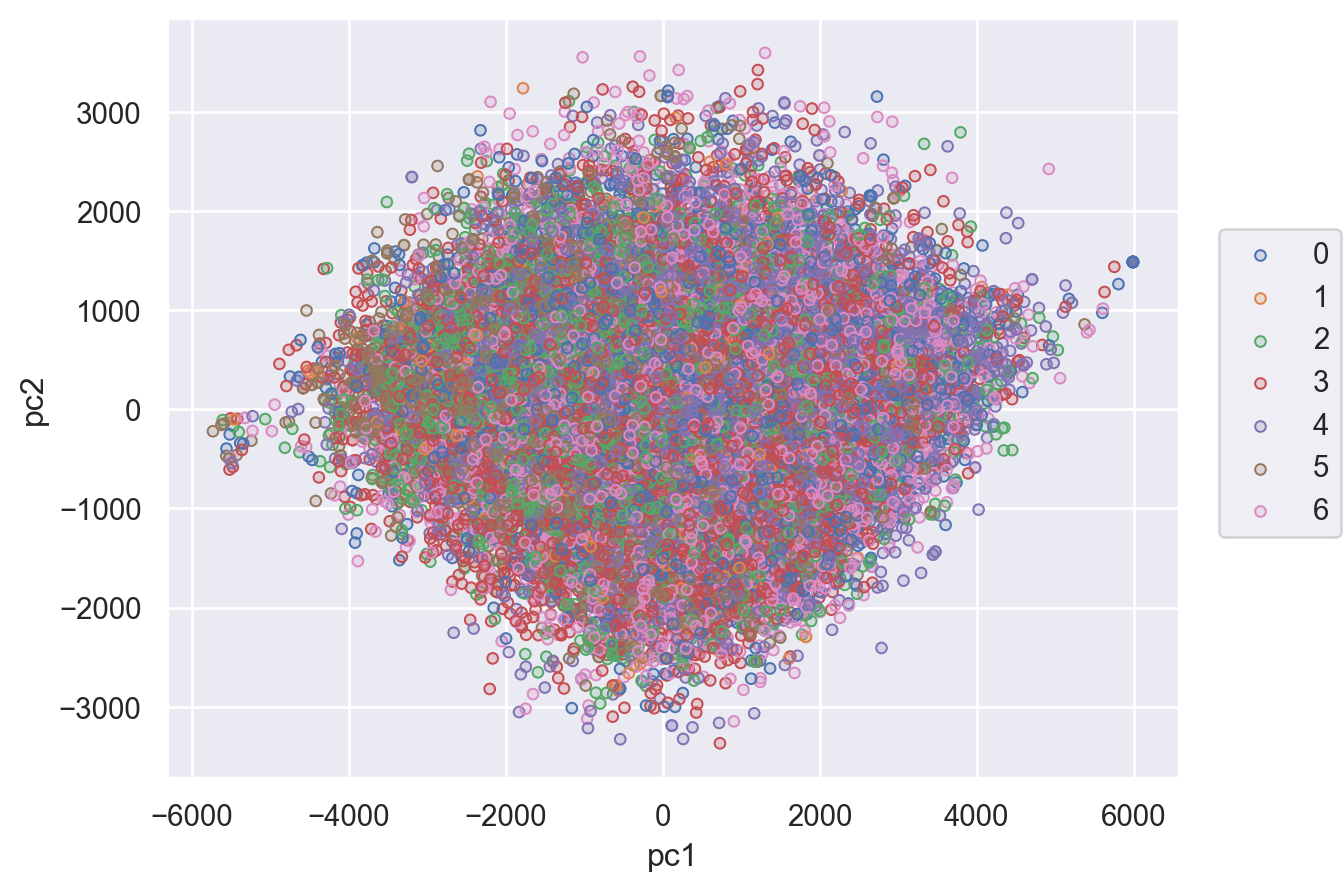

In [13]:
df_pca = pd.DataFrame(data_pca,columns=['pc1','pc2'])
(
    so.Plot(df_pca, x="pc1", y="pc2", color = labels)
    .add(so.Dots())
)

<Axes: xlabel='pc1', ylabel='pc2'>

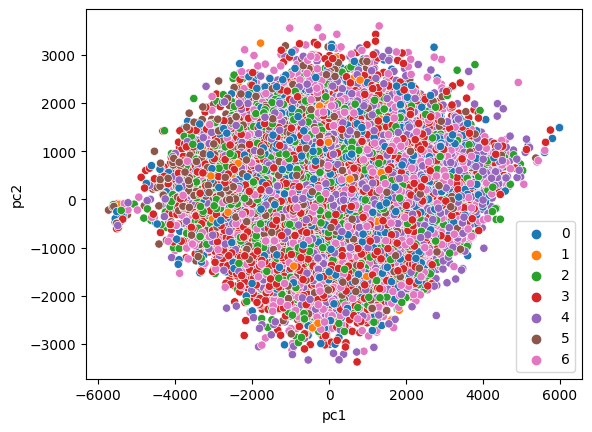

In [14]:
sns.scatterplot(df_pca,x="pc1",y="pc2",hue = labels)

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

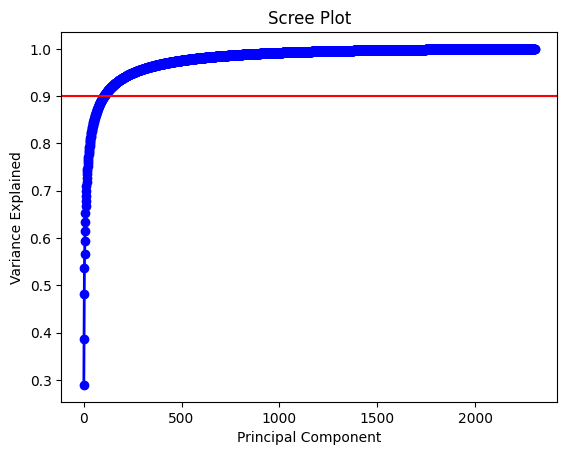

In [15]:
pca = PCA(n_components = 48*48)
pca.fit(data_transf)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.axhline(y= 0.9,color = 'r')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [16]:
evr = np.cumsum(pca.explained_variance_ratio_)

In [17]:
recall_component = 0
for i in range(1, 48*48):
    if evr[i] >= .9:
        recall_component = i
        break
recall_component

103

In [18]:
pca = PCA(n_components = recall_component)
pca.fit(data_transf)


PCA(n_components=103)

In [19]:
transformed_data = pca.transform(data_transf)

In [20]:
transformed_data_df = pd.DataFrame(transformed_data)

In [21]:
transformed_data_df.to_csv('transformed_data.csv', index = False)

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

We will deploy 3 machine learning models and 1 MLP models
- Logistic Regression, SVM and MLP, using the PyTorch framework
- Gaussian Naive Bayes model using scikit-learn.


*Note: PyTorch will be used for Logistic Regression and SVM, while scikit-learn will be used for Gaussian Naive Bayes.*


To perform the tuning process to find the hyperparameters, including batch-size and some specific parameters, for models using the PyTorch framework.

## 3.1 Original Data




### Feature Engineering

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df['pixels'] = df['pixels'].apply(lambda x: list(map(int, x.split())))

num_features = len(df['pixels'][0])
assert all(len(pixels) == num_features for pixels in df['pixels'])

X = np.array(df['pixels'].tolist())
y = np.array(df['emotion'])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Data Loader

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score

In [25]:
from torch.utils.data import DataLoader, Dataset

In [26]:
class EmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long) 
    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [27]:
train_dataset = EmotionDataset(X_train, y_train)
test_dataset = EmotionDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### 3.1.1 Logistic Regression

### Define the logistic regression model

In [45]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.linear(x)
    
def train_and_evaluate(num_epochs, train_loader, test_loader, model, criterion, optimizer):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        # Validation step
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_loss /= len(test_loader)
        val_accuracy = correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f} || '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

    # Evaluate on test data
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    print("\nLogistic Regression")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:", confusion_matrix(y_true, y_pred))

    # Plot loss and accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Hyperparameter Tuning

In [31]:
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [64, 128],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy = 0
best_params = None
num_epochs = 5
for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    # Create model
    input_dim = X_train.shape[1]
    num_classes = len(np.unique(y_train))
    model = LogisticRegressionModel(input_dim=input_dim, num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    #num_epochs = 5
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.numpy())
                all_labels.extend(y_batch.numpy())
        accuracy = accuracy_score(all_labels, all_preds)
        
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(y_batch.numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f'Best Accuracy: {best_accuracy:.4f} with params: {best_params}')


Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.3564
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3316
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3370
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.2514
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.1, 'optimizer': 'SGD'}
Test Accuracy: 0.1786
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.1, 'optimizer': 'Adam'}
Test Accuracy: 0.2275
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.3553
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3279
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3172
Testing params: 

Best params of logistic: 

Best Accuracy: 0.3569 with params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}


### Instantiate the model

In [30]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
model = LogisticRegressionModel(input_dim=input_dim, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)


Epoch [1/20], Train Loss: 1.6893, Train Accuracy: 0.3751 || Val Loss: 1.7161, Val Accuracy: 0.3618
Epoch [2/20], Train Loss: 1.6791, Train Accuracy: 0.3791 || Val Loss: 1.7085, Val Accuracy: 0.3628
Epoch [3/20], Train Loss: 1.6705, Train Accuracy: 0.3811 || Val Loss: 1.7031, Val Accuracy: 0.3667
Epoch [4/20], Train Loss: 1.6624, Train Accuracy: 0.3816 || Val Loss: 1.6992, Val Accuracy: 0.3654
Epoch [5/20], Train Loss: 1.6555, Train Accuracy: 0.3864 || Val Loss: 1.6986, Val Accuracy: 0.3599
Epoch [6/20], Train Loss: 1.6488, Train Accuracy: 0.3879 || Val Loss: 1.6901, Val Accuracy: 0.3681
Epoch [7/20], Train Loss: 1.6429, Train Accuracy: 0.3928 || Val Loss: 1.6890, Val Accuracy: 0.3693
Epoch [8/20], Train Loss: 1.6384, Train Accuracy: 0.3933 || Val Loss: 1.6840, Val Accuracy: 0.3657
Epoch [9/20], Train Loss: 1.6329, Train Accuracy: 0.3936 || Val Loss: 1.6855, Val Accuracy: 0.3640
Epoch [10/20], Train Loss: 1.6281, Train Accuracy: 0.3953 || Val Loss: 1.6808, Val Accuracy: 0.3711
Epoch [11

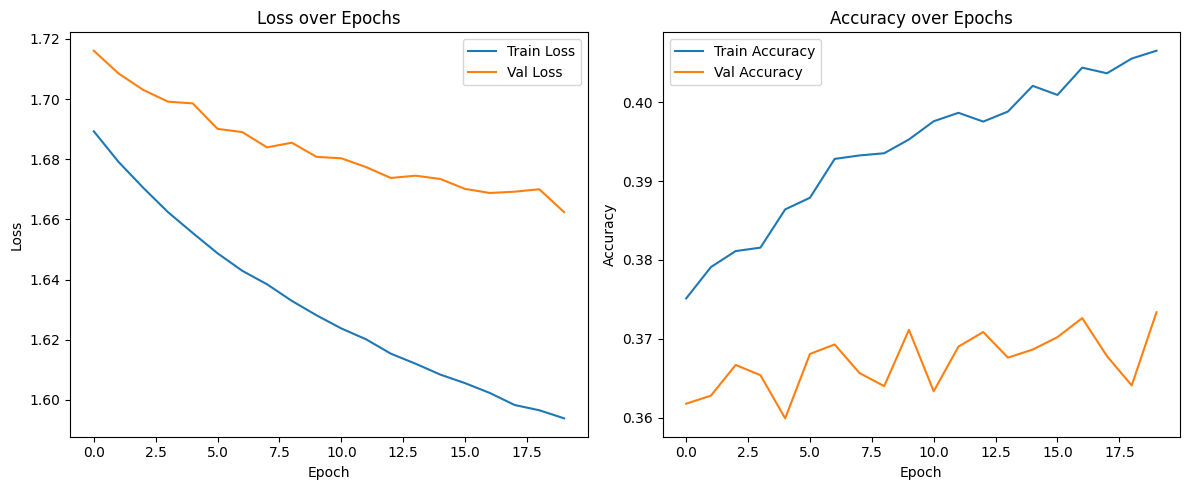

In [32]:
train_and_evaluate(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, criterion=criterion, optimizer=optimizer)

### 3.1.2 SVM

### Define the SVM model

In [33]:
class SVMModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SVMModel, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.linear(x)

def hinge_loss(outputs, targets):
    targets_one_hot = torch.eye(outputs.size(1))[targets].to(outputs.device)
    hinge_loss_value = torch.mean(torch.clamp(1 - targets_one_hot * outputs, min=0))
    return hinge_loss_value

In [34]:
def train_and_evaluate_svm(num_epochs, train_loader, test_loader, model, optimizer):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = hinge_loss(outputs, y_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

        epoch_loss /= len(train_loader)
        epoch_accuracy = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        # Validation step
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = hinge_loss(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_loss /= len(test_loader)
        val_accuracy = correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

    # Evaluate on test data
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    print("\nSVM")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:", confusion_matrix(y_true, y_pred))

    # Plot loss and accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Hyperparameter Tuning

In [18]:
param_grid = {
    'lr': [0.001, 0.01],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [32, 64],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy = 0
best_params = None
num_epochs = 5
num_classes = len(np.unique(y_train))

for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    
    input_dim = X_train.shape[1]
    model = SVMModel(input_dim=input_dim, num_classes=num_classes)
    
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = hinge_loss(outputs, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = torch.argmax(outputs, dim=1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f'Best Accuracy: {best_accuracy:.4f} with params: {best_params}')


Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2959
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.2460
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3253
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.1997
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2978
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.2712
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3161
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.1224
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2640
Testing params

Best params of SVM:

Best Accuracy: 0.3315 with params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}

### Instantiate the model

Epoch [1/20], Loss: 0.9636, Accuracy: 0.2632, Val Loss: 0.9501, Val Accuracy: 0.2984
Epoch [2/20], Loss: 0.9430, Accuracy: 0.3140, Val Loss: 0.9401, Val Accuracy: 0.3139
Epoch [3/20], Loss: 0.9335, Accuracy: 0.3274, Val Loss: 0.9325, Val Accuracy: 0.3284
Epoch [4/20], Loss: 0.9264, Accuracy: 0.3337, Val Loss: 0.9264, Val Accuracy: 0.3279
Epoch [5/20], Loss: 0.9205, Accuracy: 0.3341, Val Loss: 0.9218, Val Accuracy: 0.3317
Epoch [6/20], Loss: 0.9154, Accuracy: 0.3371, Val Loss: 0.9171, Val Accuracy: 0.3343
Epoch [7/20], Loss: 0.9107, Accuracy: 0.3391, Val Loss: 0.9133, Val Accuracy: 0.3266
Epoch [8/20], Loss: 0.9066, Accuracy: 0.3384, Val Loss: 0.9091, Val Accuracy: 0.3309
Epoch [9/20], Loss: 0.9026, Accuracy: 0.3406, Val Loss: 0.9052, Val Accuracy: 0.3318
Epoch [10/20], Loss: 0.8991, Accuracy: 0.3418, Val Loss: 0.9023, Val Accuracy: 0.3309
Epoch [11/20], Loss: 0.8959, Accuracy: 0.3441, Val Loss: 0.8990, Val Accuracy: 0.3284
Epoch [12/20], Loss: 0.8929, Accuracy: 0.3426, Val Loss: 0.8959

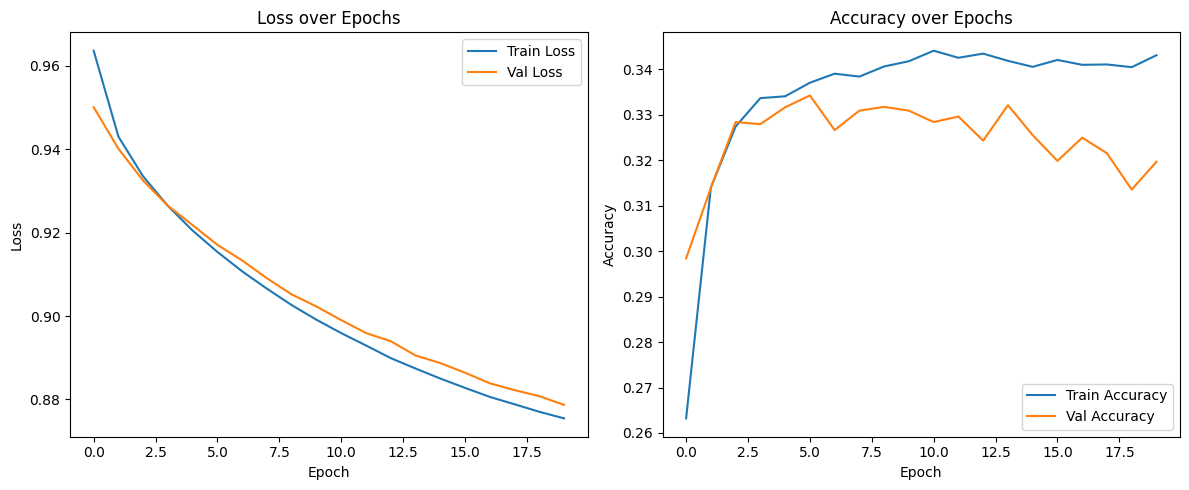

In [36]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = SVMModel(input_dim=input_dim, num_classes=num_classes)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=.01)

train_and_evaluate_svm(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, optimizer=optimizer)

### 3.1.3 Gaussian Naive Bayes

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

### Define the Gaussian Naive Bayes model

In [38]:
gnb = GaussianNB()

### Hyperparameter Tuning

In [39]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=50),  # Range of values for var_smoothing
    'priors': [None, [0.3, 0.4], [0.2, 0.5]]  # Prior probabilities for the classes
}

In [40]:
#GridSearchCV
gnb_best = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)


### Instantiate the model

In [41]:
gnb_best.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.3, 0.4], [0.2, 0.5]],
                         'var_smoothing': array([1.00000000e+00, 6.55128557e-01, 4.29193426e-01, 2.81176870e-01,
       1.84206997e-01, 1.20679264e-01, 7.90604321e-02, 5.17947468e-02,
       3.39322177e-02, 2.22299648e-02, 1.45634848e-02, 9.54095476e-03,
       6.25055193e-03, 4.09491506e-03, 2.68269580e-03, 1.75751062e-0...
       7.19685673e-06, 4.71486636e-06, 3.08884360e-06, 2.02358965e-06,
       1.32571137e-06, 8.68511374e-07, 5.68986603e-07, 3.72759372e-07,
       2.44205309e-07, 1.59985872e-07, 1.04811313e-07, 6.86648845e-08,
       4.49843267e-08, 2.94705170e-08, 1.93069773e-08, 1.26485522e-08,
       8.28642773e-09, 5.42867544e-09, 3.55648031e-09, 2.32995181e-09,
       1.52641797e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [42]:
import joblib

print(f'Best parameters: {gnb_best.best_params_}')
print(f'Best cross-validation accuracy: {gnb_best.best_score_:.4f}')

joblib_file = "gnb_best_model.pkl"
joblib.dump(gnb_best.best_estimator_, joblib_file)

Best parameters: {'priors': None, 'var_smoothing': 0.0026826957952797246}
Best cross-validation accuracy: 0.2126


['gnb_best_model.pkl']

In [43]:
y_pred = gnb_best.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))


Accuracy: 0.2118
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.06      0.09      1467
           1       0.02      0.15      0.03       167
           2       0.21      0.05      0.08      1566
           3       0.42      0.14      0.21      2714
           4       0.24      0.40      0.30      1793
           5       0.20      0.59      0.29      1190
           6       0.26      0.16      0.20      1870

    accuracy                           0.21     10767
   macro avg       0.22      0.22      0.17     10767
weighted avg       0.27      0.21      0.20     10767

Confusion Matrix: [[ 82 223  63  94 451 421 133]
 [ 10  25   1  17  33  70  11]
 [ 59 201  79  96 377 631 123]
 [ 89 379  68 390 658 844 286]
 [ 63 264  72 112 710 392 180]
 [ 30 121  36  76 137 698  92]
 [ 53 237  56 134 573 521 296]]


## 3.1.4 MLP

### Define the MLP model

Create Basic MLP Model

- Fully connected layer (fc1_input, fc2_output)
- Rectified Linear Unit  (relu)

In [48]:
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


### Hyperparameter Tuning

In [28]:
criterion = nn.CrossEntropyLoss()
param_grid = {
    'lr': [0.001, 0.01],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [32, 64],
    'hidden_dim': [32, 64, 128],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy = 0
best_params = None
num_epochs = 5
num_classes = len(np.unique(y_train))

for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    
    input_dim = X_train.shape[1]
    hidden_dim = params['hidden_dim']
    model = MLPModel(input_dim=input_dim, hidden_dim=hidden_dim, num_classes=num_classes)
    
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = torch.argmax(outputs, dim=1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f'Best Accuracy: {best_accuracy:.4f} with params: {best_params}')


Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.3636
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3709
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.4004
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.2176
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.3534
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3259
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3668
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'Adam'}
Te

Best Params of Deeplearning Model (MLP):


Best Accuracy: 0.4060 with params: {'batch_size': 32, 'hidden_dim': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}

### Instantiate the model

In [52]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
model = MLPModel(input_dim=input_dim, hidden_dim=64, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)


Epoch [1/20], Train Loss: 1.6870, Train Accuracy: 0.3403 || Val Loss: 1.6281, Val Accuracy: 0.3708
Epoch [2/20], Train Loss: 1.5800, Train Accuracy: 0.3937 || Val Loss: 1.5857, Val Accuracy: 0.3879
Epoch [3/20], Train Loss: 1.5344, Train Accuracy: 0.4131 || Val Loss: 1.5757, Val Accuracy: 0.3897
Epoch [4/20], Train Loss: 1.5049, Train Accuracy: 0.4240 || Val Loss: 1.5512, Val Accuracy: 0.4012
Epoch [5/20], Train Loss: 1.4790, Train Accuracy: 0.4332 || Val Loss: 1.5492, Val Accuracy: 0.3991
Epoch [6/20], Train Loss: 1.4570, Train Accuracy: 0.4436 || Val Loss: 1.5433, Val Accuracy: 0.4060
Epoch [7/20], Train Loss: 1.4389, Train Accuracy: 0.4548 || Val Loss: 1.5402, Val Accuracy: 0.3996
Epoch [8/20], Train Loss: 1.4202, Train Accuracy: 0.4635 || Val Loss: 1.5461, Val Accuracy: 0.3999
Epoch [9/20], Train Loss: 1.4043, Train Accuracy: 0.4689 || Val Loss: 1.5463, Val Accuracy: 0.4103
Epoch [10/20], Train Loss: 1.3903, Train Accuracy: 0.4773 || Val Loss: 1.5238, Val Accuracy: 0.4112
Epoch [11

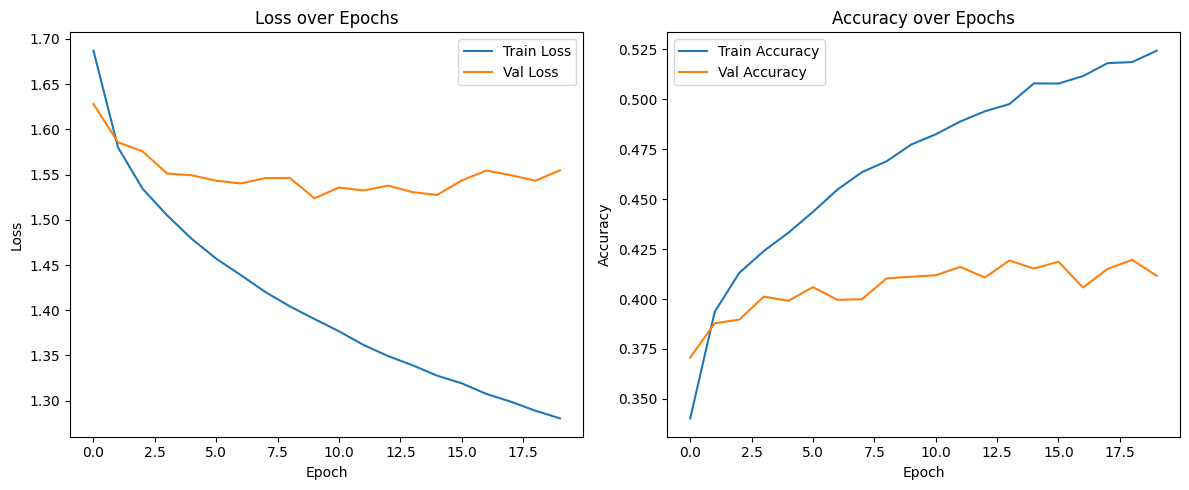

In [53]:
train_and_evaluate(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, criterion=criterion, optimizer=optimizer)

## 3.2 Transformed Data

### Feature Engineering || Data Loader

In [54]:
labels

[0, 0, 2, 4, 6, ..., 6, 3, 0, 3, 2]
Length: 35887
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [55]:
transformed_data

array([[  691.75085917,  -442.32864891,  -864.12555275, ...,
          -28.04370012,   -15.18211285,    51.63221241],
       [  -62.02548935,   561.76220691,   565.14973499, ...,
          -75.79332755,    -6.73375625,   104.43529518],
       [-1322.53807047,  -415.72968556, -1930.81347855, ...,
         -129.8396271 ,   -81.14348491,   149.76960294],
       ...,
       [-1289.15565244, -1408.56832025,   411.25151834, ...,
          -44.52466898,     5.22369589,   -67.20587596],
       [ 2008.41357066,  -125.61090868,  -502.70608108, ...,
           58.48899518,   -51.36160722,   -42.35910028],
       [ -210.23902665,  -486.5690975 ,  -581.47176983, ...,
           19.86854958,    96.95557239,    61.3073184 ]])

In [58]:
### split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [60]:
train_dataset = EmotionDataset(X_train, y_train)
test_dataset = EmotionDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [61]:
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x1e79cb5f050>,
 <torch.utils.data.dataloader.DataLoader at 0x1e79dceb2d0>)

We will use models was built and implement hyperparameter tuning again with transformed data

## 3.2.1 Logistic Regression

### Hyperparameter Tuning

In [62]:
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [64, 128],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy = 0
best_params = None
num_epochs = 5
for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    # Create model
    input_dim = X_train.shape[1]
    num_classes = len(np.unique(y_train))
    model = LogisticRegressionModel(input_dim=input_dim, num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    #num_epochs = 5
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.numpy())
                all_labels.extend(y_batch.numpy())
        accuracy = accuracy_score(all_labels, all_preds)
        
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(y_batch.numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f'Best Accuracy: {best_accuracy:.4f} with params: {best_params}')


Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2757
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3682
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3667
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.3465
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.1, 'optimizer': 'SGD'}
Test Accuracy: 0.3603
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.1, 'optimizer': 'Adam'}
Test Accuracy: 0.2710
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2636
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3640
Testing params: {'batch_size': 64, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3656
Testing params: 

Best params of logistic:

Best Accuracy: 0.3682 with params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}

### Instantiate the model

In [63]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
model = LogisticRegressionModel(input_dim=input_dim, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

Epoch [1/20], Train Loss: 1.8251, Train Accuracy: 0.2967 || Val Loss: 1.7088, Val Accuracy: 0.3642
Epoch [2/20], Train Loss: 1.6697, Train Accuracy: 0.3733 || Val Loss: 1.6647, Val Accuracy: 0.3654
Epoch [3/20], Train Loss: 1.6444, Train Accuracy: 0.3755 || Val Loss: 1.6502, Val Accuracy: 0.3651
Epoch [4/20], Train Loss: 1.6349, Train Accuracy: 0.3751 || Val Loss: 1.6455, Val Accuracy: 0.3679
Epoch [5/20], Train Loss: 1.6303, Train Accuracy: 0.3759 || Val Loss: 1.6413, Val Accuracy: 0.3682
Epoch [6/20], Train Loss: 1.6276, Train Accuracy: 0.3758 || Val Loss: 1.6390, Val Accuracy: 0.3681
Epoch [7/20], Train Loss: 1.6263, Train Accuracy: 0.3735 || Val Loss: 1.6380, Val Accuracy: 0.3656
Epoch [8/20], Train Loss: 1.6253, Train Accuracy: 0.3755 || Val Loss: 1.6364, Val Accuracy: 0.3656
Epoch [9/20], Train Loss: 1.6253, Train Accuracy: 0.3736 || Val Loss: 1.6382, Val Accuracy: 0.3667
Epoch [10/20], Train Loss: 1.6246, Train Accuracy: 0.3750 || Val Loss: 1.6366, Val Accuracy: 0.3653
Epoch [11

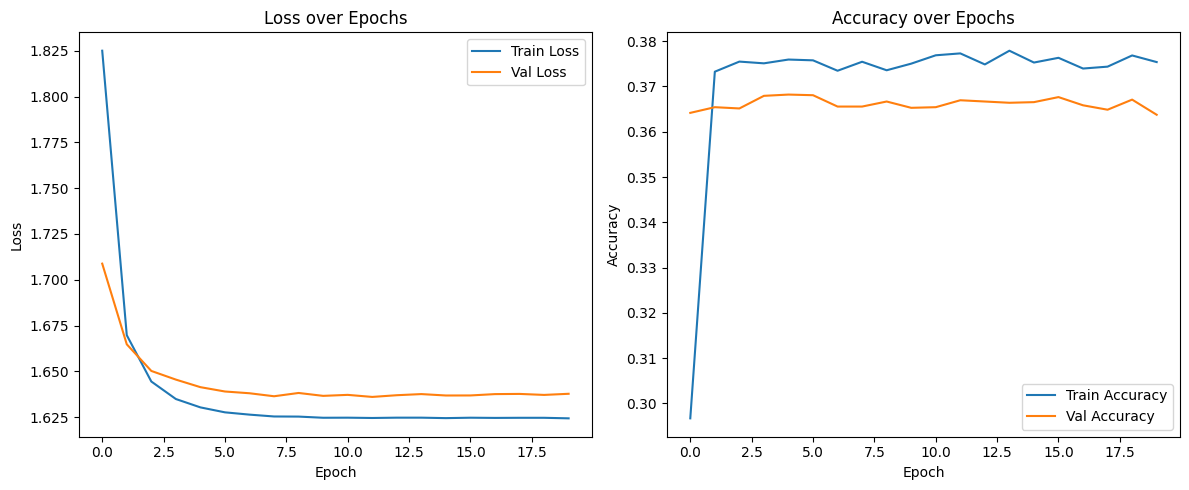

In [64]:
train_and_evaluate(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, criterion=criterion, optimizer=optimizer)

## 3.2.2 SVM Model

### Hyperparameter Tuning

In [65]:
param_grid = {
    'lr': [0.001, 0.01],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [32, 64],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy = 0
best_params = None
num_epochs = 5
num_classes = len(np.unique(y_train))

for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    
    input_dim = X_train.shape[1]
    model = SVMModel(input_dim=input_dim, num_classes=num_classes)
    
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = hinge_loss(outputs, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = torch.argmax(outputs, dim=1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f'Best Accuracy: {best_accuracy:.4f} with params: {best_params}')

Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.1698
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3006
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3344
Testing params: {'batch_size': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.2770
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.1772
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3522
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3628
Testing params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.2843
Testing params: {'batch_size': 64, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.1675
Testing params

Best params of SVM: 

Best Accuracy: 0.3628 with params: {'batch_size': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}

### Instantiate the model

Epoch [1/20], Loss: 0.9903, Accuracy: 0.1772, Val Loss: 0.9760, Val Accuracy: 0.2388
Epoch [2/20], Loss: 0.9673, Accuracy: 0.2961, Val Loss: 0.9621, Val Accuracy: 0.3364
Epoch [3/20], Loss: 0.9581, Accuracy: 0.3592, Val Loss: 0.9564, Val Accuracy: 0.3590
Epoch [4/20], Loss: 0.9544, Accuracy: 0.3678, Val Loss: 0.9541, Val Accuracy: 0.3608
Epoch [5/20], Loss: 0.9529, Accuracy: 0.3716, Val Loss: 0.9533, Val Accuracy: 0.3621
Epoch [6/20], Loss: 0.9524, Accuracy: 0.3727, Val Loss: 0.9529, Val Accuracy: 0.3611
Epoch [7/20], Loss: 0.9521, Accuracy: 0.3715, Val Loss: 0.9527, Val Accuracy: 0.3615
Epoch [8/20], Loss: 0.9520, Accuracy: 0.3722, Val Loss: 0.9527, Val Accuracy: 0.3618
Epoch [9/20], Loss: 0.9519, Accuracy: 0.3717, Val Loss: 0.9527, Val Accuracy: 0.3625
Epoch [10/20], Loss: 0.9519, Accuracy: 0.3714, Val Loss: 0.9526, Val Accuracy: 0.3631
Epoch [11/20], Loss: 0.9519, Accuracy: 0.3703, Val Loss: 0.9526, Val Accuracy: 0.3622
Epoch [12/20], Loss: 0.9519, Accuracy: 0.3715, Val Loss: 0.9526

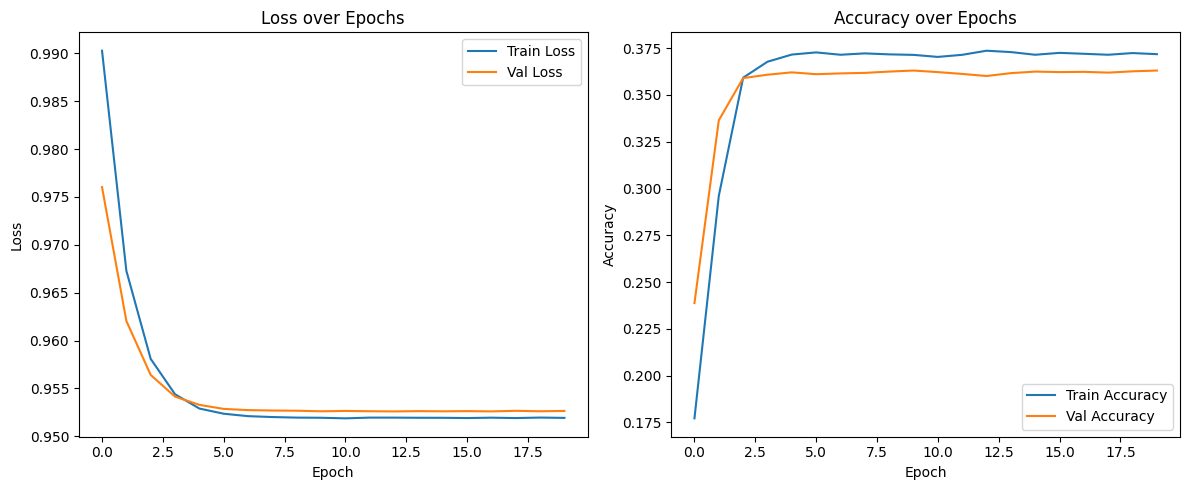

In [66]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = SVMModel(input_dim=input_dim, num_classes=num_classes)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=.1)

train_and_evaluate_svm(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, optimizer=optimizer)

## 3.2.3 Gaussian Naive Bayes

### Define the Gaussian Naive Bayes Model

In [67]:
gnb_transf = GaussianNB()

### Hyperparameter Tuning

In [68]:
#GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=50),  # Range of values for var_smoothing
    'priors': [None, [0.3, 0.4], [0.2, 0.5]]  # Prior probabilities for the classes
}
gnb_best_ = GridSearchCV(estimator=gnb_transf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)


### Instantiate the model

In [69]:
gnb_best_.fit(X_train, y_train)

print(f'Best parameters: {gnb_best_.best_params_}')
print(f'Best cross-validation accuracy: {gnb_best_.best_score_:.4f}')

joblib_file = "gnb_best_model_transf_data.pkl"
joblib.dump(gnb_best_.best_estimator_, joblib_file)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best parameters: {'priors': None, 'var_smoothing': 0.281176869797423}
Best cross-validation accuracy: 0.3246


['gnb_best_model_transf_data.pkl']

In [71]:
y_pred = gnb_best_.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))


Accuracy: 0.3158
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.09      0.14       985
           1       0.06      0.22      0.10       102
           2       0.24      0.10      0.14      1043
           3       0.33      0.73      0.46      1765
           4       0.27      0.14      0.18      1210
           5       0.52      0.30      0.38       795
           6       0.32      0.27      0.29      1278

    accuracy                           0.32      7178
   macro avg       0.29      0.26      0.24      7178
weighted avg       0.31      0.32      0.28      7178

Confusion Matrix: [[  92   61   59  496   81   48  148]
 [   9   22    4   45    5    6   11]
 [  54   43  108  515  106   67  150]
 [  69   47   83 1295  123   33  115]
 [  51   62   87  607  167   23  213]
 [  24   40   56  309   28  235  103]
 [  55   70   57  605  101   42  348]]


## 3.2.4 MLP Model

### Hyperparameter Tuning

In [73]:
criterion = nn.CrossEntropyLoss()
param_grid = {
    'lr': [0.001, 0.01],
    'optimizer': ['SGD', 'Adam'],
    'batch_size': [32, 64],
    'hidden_dim': [32, 64, 128],
    'l2_penalty': [0.01, 0.1]
}

best_accuracy = 0
best_params = None
num_epochs = 5
num_classes = len(np.unique(y_train))

for params in ParameterGrid(param_grid):
    print(f'Testing params: {params}')
    
    input_dim = X_train.shape[1]
    hidden_dim = params['hidden_dim']
    model = MLPModel(input_dim=input_dim, hidden_dim=hidden_dim, num_classes=num_classes)
    
    if params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    elif params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['l2_penalty'])
    
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)
    
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
    
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = torch.argmax(outputs, dim=1)
            y_pred_list.append(predicted)
            y_true_list.append(y_batch)
    
    y_pred = torch.cat(y_pred_list).cpu().numpy()
    y_true = torch.cat(y_true_list).cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f'Best Accuracy: {best_accuracy:.4f} with params: {best_params}')


Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2534
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.3870
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.3682
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.01, 'lr': 0.01, 'optimizer': 'Adam'}
Test Accuracy: 0.3403
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'SGD'}
Test Accuracy: 0.2463
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.001, 'optimizer': 'Adam'}
Test Accuracy: 0.2513
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'SGD'}
Test Accuracy: 0.2459
Testing params: {'batch_size': 32, 'hidden_dim': 32, 'l2_penalty': 0.1, 'lr': 0.01, 'optimizer': 'Adam'}
Te

Best params of MLP:

Best Accuracy: 0.4016 with params: {'batch_size': 64, 'hidden_dim': 128, 'l2_penalty': 0.01, 'lr': 0.001, 'optimizer': 'Adam'}

### Instantiate the model

Epoch [1/20], Train Loss: 1.6764, Train Accuracy: 0.3472 || Val Loss: 1.6167, Val Accuracy: 0.3746
Epoch [2/20], Train Loss: 1.5871, Train Accuracy: 0.3898 || Val Loss: 1.5928, Val Accuracy: 0.3817
Epoch [3/20], Train Loss: 1.5641, Train Accuracy: 0.3990 || Val Loss: 1.5792, Val Accuracy: 0.3879
Epoch [4/20], Train Loss: 1.5459, Train Accuracy: 0.4076 || Val Loss: 1.5679, Val Accuracy: 0.3912
Epoch [5/20], Train Loss: 1.5321, Train Accuracy: 0.4145 || Val Loss: 1.5524, Val Accuracy: 0.4054
Epoch [6/20], Train Loss: 1.5213, Train Accuracy: 0.4192 || Val Loss: 1.5513, Val Accuracy: 0.4082
Epoch [7/20], Train Loss: 1.5127, Train Accuracy: 0.4237 || Val Loss: 1.5480, Val Accuracy: 0.4075
Epoch [8/20], Train Loss: 1.5060, Train Accuracy: 0.4281 || Val Loss: 1.5421, Val Accuracy: 0.4129
Epoch [9/20], Train Loss: 1.5005, Train Accuracy: 0.4319 || Val Loss: 1.5409, Val Accuracy: 0.4106
Epoch [10/20], Train Loss: 1.4954, Train Accuracy: 0.4332 || Val Loss: 1.5408, Val Accuracy: 0.4129
Epoch [11

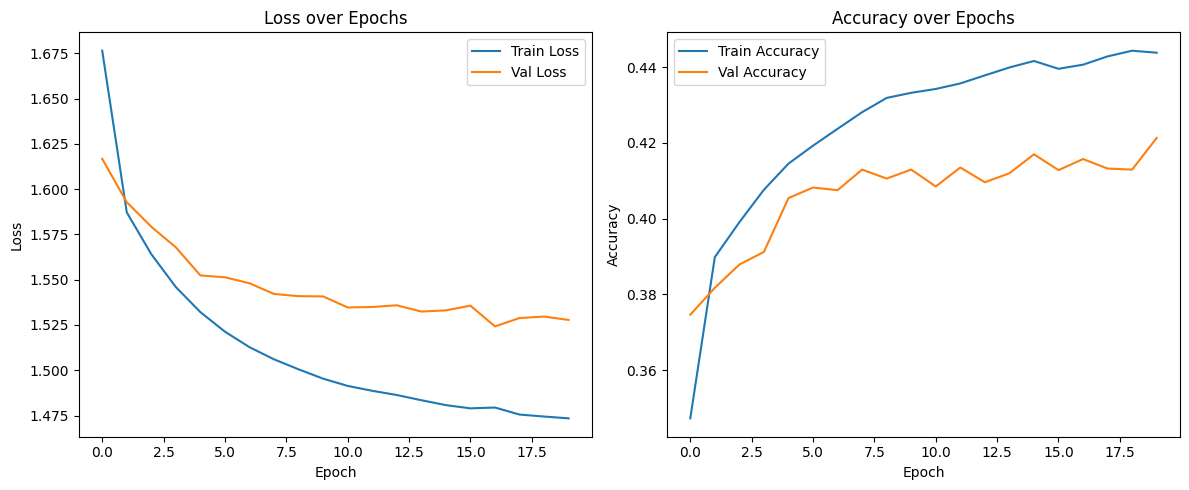

In [74]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
model = MLPModel(input_dim=input_dim, hidden_dim=128, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
train_and_evaluate(num_epochs=20, train_loader=train_loader, test_loader=test_loader, model=model, criterion=criterion, optimizer=optimizer)

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
## visualize the confusion matrices and classification reports here